In [1]:
import pandas as pd
import numpy as np
import os
import datetime
root_dir='/Users/zhilinyang/Desktop/ATC18'

In [3]:
test = pd.read_csv('/Users/zhilinyang/Desktop/ATC18/2017-12-01.csv')

In [5]:
test.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2017-12-01,Z305B2QN,ST4000DM000,4000787030016,0,120,240651608,NaN,NaN,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-12-01,PL1331LAHG1S4H,HGST HMS5C4040ALE640,4000787030016,0,100,0,134.0,102.0,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-12-01,ZA16NQJR,ST8000NM0055,8001563222016,0,80,102350616,NaN,NaN,94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-12-01,ZA18CEBT,ST8000NM0055,8001563222016,0,83,215907568,NaN,NaN,96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-12-01,ZA18CEBS,ST8000NM0055,8001563222016,0,69,8337248,NaN,NaN,97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
features_list=test.columns[5:]
features_list

Index(['smart_1_normalized', 'smart_1_raw', 'smart_2_normalized',
       'smart_2_raw', 'smart_3_normalized', 'smart_3_raw',
       'smart_4_normalized', 'smart_4_raw', 'smart_5_normalized',
       'smart_5_raw', 'smart_7_normalized', 'smart_7_raw',
       'smart_8_normalized', 'smart_8_raw', 'smart_9_normalized',
       'smart_9_raw', 'smart_10_normalized', 'smart_10_raw',
       'smart_11_normalized', 'smart_11_raw', 'smart_12_normalized',
       'smart_12_raw', 'smart_13_normalized', 'smart_13_raw',
       'smart_15_normalized', 'smart_15_raw', 'smart_22_normalized',
       'smart_22_raw', 'smart_183_normalized', 'smart_183_raw',
       'smart_184_normalized', 'smart_184_raw', 'smart_187_normalized',
       'smart_187_raw', 'smart_188_normalized', 'smart_188_raw',
       'smart_189_normalized', 'smart_189_raw', 'smart_190_normalized',
       'smart_190_raw', 'smart_191_normalized', 'smart_191_raw',
       'smart_192_normalized', 'smart_192_raw', 'smart_193_normalized',
       'smart

In [8]:
def file_preprocessing(model_name, features_list, root_dir):
    total_df = pd.DataFrame()
    type_dict = {feature: np.float32 for feature in features_list}
    type_dict['failure']=np.int8
    for file in os.listdir(root_dir):
        if file=='.DS_Store':
            continue
        file_path = root_dir + '/' + file
        df = pd.read_csv(file_path, dtype=type_dict)
        df = df.loc[df['model']== model_name].dropna(axis=1,how='all')
        total_df = total_df.append(df)
        print(file)
    total_df=total_df.drop(['model','capacity_bytes'],axis=1)
    return total_df

In [ ]:
total_df=file_preprocessing('ST4000DM000', features_list, root_dir)

In [12]:
total_df.head()

,date,serial_number,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,...,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,smart_240_normalized,smart_240_raw,smart_241_normalized,smart_241_raw,smart_242_normalized,smart_242_raw
0,2017-10-01,Z305B2QN,0,116.0,102427200.0,91.0,0.0,100.0,10.0,100.0,...,100.0,0.0,200.0,0.0,100.0,15487.0,100.0,3.751089e+10,100.0,4.036694e+10
10,2017-10-01,Z3023VGH,0,117.0,139006624.0,92.0,0.0,100.0,15.0,100.0,...,100.0,0.0,200.0,0.0,100.0,25745.0,100.0,2.254739e+10,100.0,1.668102e+11
14,2017-10-01,Z301CEB2,0,120.0,241804672.0,91.0,0.0,100.0,17.0,100.0,...,100.0,0.0,200.0,0.0,100.0,18477.0,100.0,1.783750e+10,100.0,1.249269e+11
17,2017-10-01,Z306WYZZ,0,115.0,90595592.0,95.0,0.0,100.0,5.0,100.0,...,100.0,0.0,200.0,0.0,100.0,1021.0,100.0,1.000933e+10,100.0,9.233834e+09
18,2017-10-01,S300ZP5B,0,117.0,145617408.0,92.0,0.0,100.0,8.0,100.0,...,100.0,0.0,200.0,0.0,100.0,19404.0,100.0,4.726250e+10,100.0,5.348619e+10


In [17]:
total_df.to_csv(path_or_buf=r"/Users/zhilinyang/Desktop/work/ATC18/STA_17Q4.csv")

In [16]:
fail_names = total_df.loc[total_df['failure'] == 1]['serial_number'].unique()
print('n_disks: ' + str(total_df['serial_number'].unique().size))
print('n_failed: ' + str(fail_names.size))
percent=(total_df['serial_number'].unique().size-fail_names.size)/fail_names.size
print('percentage: ' + str(percent))

n_disks: 33341
n_failed: 235
percentage: 140.87659574468086


In [2]:
total_df=pd.read_csv(r"/Users/zhilinyang/Desktop/work/ATC18/STA_17Q4.csv")
total_df=total_df.iloc[:,1:]
total_df.head()

,date,serial_number,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,...,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,smart_240_normalized,smart_240_raw,smart_241_normalized,smart_241_raw,smart_242_normalized,smart_242_raw
0,2017-10-01,Z305B2QN,0,116.0,102427200.0,91.0,0.0,100.0,10.0,100.0,...,100.0,0.0,200.0,0.0,100.0,15487.0,100.0,3.751089e+10,100.0,4.036694e+10
1,2017-10-01,Z3023VGH,0,117.0,139006624.0,92.0,0.0,100.0,15.0,100.0,...,100.0,0.0,200.0,0.0,100.0,25745.0,100.0,2.254739e+10,100.0,1.668102e+11
2,2017-10-01,Z301CEB2,0,120.0,241804672.0,91.0,0.0,100.0,17.0,100.0,...,100.0,0.0,200.0,0.0,100.0,18477.0,100.0,1.783750e+10,100.0,1.249269e+11
3,2017-10-01,Z306WYZZ,0,115.0,90595592.0,95.0,0.0,100.0,5.0,100.0,...,100.0,0.0,200.0,0.0,100.0,1021.0,100.0,1.000933e+10,100.0,9.233834e+09
4,2017-10-01,S300ZP5B,0,117.0,145617408.0,92.0,0.0,100.0,8.0,100.0,...,100.0,0.0,200.0,0.0,100.0,19404.0,100.0,4.726250e+10,100.0,5.348619e+10


In [3]:
new_features=[]
for c in total_df.columns:
    if c.lower()[-10:] != 'normalized':
        new_features.append(c)
print(new_features)

['date', 'serial_number', 'failure', 'smart_1_raw', 'smart_3_raw', 'smart_4_raw', 'smart_5_raw', 'smart_7_raw', 'smart_9_raw', 'smart_10_raw', 'smart_12_raw', 'smart_183_raw', 'smart_184_raw', 'smart_187_raw', 'smart_188_raw', 'smart_189_raw', 'smart_190_raw', 'smart_191_raw', 'smart_192_raw', 'smart_193_raw', 'smart_194_raw', 'smart_197_raw', 'smart_198_raw', 'smart_199_raw', 'smart_240_raw', 'smart_241_raw', 'smart_242_raw']


In [4]:
total_df=total_df[new_features]
total_df.head()

,date,serial_number,failure,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_10_raw,...,smart_191_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw
0,2017-10-01,Z305B2QN,0,102427200.0,0.0,10.0,0.0,6.940097e+08,15735.0,0.0,...,0.0,0.0,34018.0,22.0,0.0,0.0,0.0,15487.0,3.751089e+10,4.036694e+10
1,2017-10-01,Z3023VGH,0,139006624.0,0.0,15.0,0.0,1.814109e+10,25971.0,0.0,...,0.0,1.0,48267.0,28.0,0.0,0.0,0.0,25745.0,2.254739e+10,1.668102e+11
2,2017-10-01,Z301CEB2,0,241804672.0,0.0,17.0,0.0,7.212762e+08,18606.0,0.0,...,0.0,0.0,36895.0,25.0,0.0,0.0,0.0,18477.0,1.783750e+10,1.249269e+11
3,2017-10-01,Z306WYZZ,0,90595592.0,0.0,5.0,0.0,2.448534e+07,1026.0,0.0,...,0.0,1.0,55.0,22.0,0.0,0.0,0.0,1021.0,1.000933e+10,9.233834e+09
4,2017-10-01,S300ZP5B,0,145617408.0,0.0,8.0,0.0,8.680031e+08,19725.0,0.0,...,0.0,0.0,39274.0,30.0,0.0,0.0,0.0,19404.0,4.726250e+10,5.348619e+10


In [5]:
error_list=total_df[total_df['smart_5_raw']>0]['serial_number'].unique()
len(error_list)

232

In [8]:
len(total_df[total_df['smart_5_raw']>0])

13797

In [7]:
def get_labels(df,attribute,error_list):
    num=0
    new_df=pd.DataFrame()
    grps=df.groupby('serial_number')
    disk_list=df['serial_number'].unique()
    for disk_name in disk_list:
        if disk_name in error_list:
            disk=grps.get_group(disk_name)
            errors=np.array(disk[attribute])
            first_err=np.nonzero(errors)[0][0]
            part1=np.arange(first_err+1)[::-1]
            part2=np.zeros(len(errors)-first_err-1)
            labels=np.concatenate([part1,part2])
        else:
            continue
        disk['label']=labels
        disk.index=range(0,len(disk))
        new_df=new_df.append(disk,ignore_index=True)
    return new_df

In [8]:
dataset=get_labels(total_df,'smart_5_raw',error_list)
dataset.head()

/Users/zhilinyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,date,serial_number,failure,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_10_raw,...,smart_192_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw,label
0,2017-10-01,Z304H3GQ,0,200303616.0,0.0,14.0,0.0,385281920.0,15041.0,0.0,...,0.0,211518.0,19.0,0.0,0.0,0.0,13428.0,1.354632e+10,8.655493e+10,10.0
1,2017-10-02,Z304H3GQ,0,240499424.0,0.0,14.0,0.0,385282688.0,15065.0,0.0,...,0.0,212915.0,19.0,0.0,0.0,0.0,13441.0,1.354632e+10,8.659333e+10,9.0
2,2017-10-03,Z304H3GQ,0,35117888.0,0.0,14.0,0.0,385283296.0,15090.0,0.0,...,0.0,214372.0,19.0,0.0,0.0,0.0,13454.0,1.354632e+10,8.663165e+10,8.0
3,2017-10-04,Z304H3GQ,0,136945408.0,0.0,14.0,0.0,385320096.0,15116.0,0.0,...,0.0,215854.0,20.0,0.0,0.0,0.0,13469.0,1.354650e+10,8.667324e+10,7.0
4,2017-10-05,Z304H3GQ,0,208011744.0,0.0,14.0,0.0,385651936.0,15140.0,0.0,...,0.0,215905.0,19.0,0.0,0.0,0.0,13493.0,1.354872e+10,8.669641e+10,6.0


In [9]:
dataset=dataset[dataset.label>0]

In [10]:
dataset=dataset.drop(['failure'],axis=1)

In [11]:
dataset.shape

(3487, 27)

In [12]:
grouped = dataset.groupby(['serial_number'], as_index=False)
features = [c for c in dataset.columns if c[-3:] == 'raw']
# get the difference of the data of a window with size 3
diff = grouped[features].transform(pd.DataFrame.diff, 3)

# get variance of the data of a window with size 7
sigma = grouped[features].transform(lambda x: x.rolling(7).var())

# get the sum of attribute valuse within a window with size 5
summation = grouped[features].transform(lambda x: x.rolling(5).sum())

In [13]:
dataset = dataset.join(other=diff, how='inner', rsuffix='_diff')
dataset = dataset.join(other=sigma, how='inner', rsuffix='_sigma')
dataset = dataset.join(other=summation, how='inner', rsuffix='_sum')
dataset.shape
dataset = dataset.dropna().sort_values(by=['date'], ascending=True).reset_index(drop=True)
dataset['date'] = pd.to_datetime(dataset['date'])
dataset['broken_day'] = dataset.groupby('serial_number')['date'].transform(lambda x: x.max())
dataset['y'] = dataset['broken_day']  - dataset['date'] + datetime.timedelta(days=1)
dataset.head()

,date,serial_number,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_10_raw,smart_12_raw,...,smart_193_raw_sum,smart_194_raw_sum,smart_197_raw_sum,smart_198_raw_sum,smart_199_raw_sum,smart_240_raw_sum,smart_241_raw_sum,smart_242_raw_sum,broken_day,y
0,2017-10-07,Z304H3GQ,104748192.0,0.0,14.0,0.0,386396672.0,15189.0,0.0,13.0,...,1077941.0,96.0,0.0,0.0,0.0,67474.0,6.774596e+10,4.334737e+11,2017-10-10,4 days
1,2017-10-07,S3015EJ2,87223784.0,0.0,5.0,0.0,423281312.0,10898.0,0.0,5.0,...,53591.0,107.0,0.0,0.0,0.0,54066.0,5.601590e+10,1.443243e+11,2017-11-05,30 days
2,2017-10-07,Z30149RX,115268592.0,0.0,30.0,0.0,875151040.0,33042.0,0.0,30.0,...,214479.0,97.0,0.0,0.0,0.0,163778.0,1.436515e+11,8.385830e+11,2017-12-07,62 days
3,2017-10-07,Z3036CV2,239166720.0,0.0,8.0,0.0,142917344.0,22610.0,0.0,8.0,...,165090.0,106.0,240.0,240.0,0.0,112195.0,9.175893e+10,5.307706e+11,2017-10-25,19 days
4,2017-10-07,Z3055XCP,82190128.0,0.0,8.0,0.0,645148992.0,14549.0,0.0,8.0,...,38007.0,138.0,0.0,0.0,0.0,72093.0,1.725957e+11,2.954218e+11,2017-11-20,45 days


In [14]:
dataset.shape

(3011, 101)

In [15]:
dataset=dataset.drop(['label'],axis=1)

In [16]:
def get_result(y_test, y_pred, threshold):
    pred = [1 if i < threshold else 0 for i in y_pred]
    true = [1 if i < threshold else 0 for i in y_test]
    return (true, pred)

In [36]:
from sklearn.metrics import f1_score
def feature_selection(dataset,theta,clf):
    training_set = dataset.loc[dataset['broken_day'].astype(str) < '2017-12-01'].copy()
    testing_set = dataset.loc[(dataset['broken_day'].astype(str) >= '2017-12-01') & (dataset['date'].astype(str) >= '2017-12-01')].copy()   
    x_train=training_set.drop(['date','serial_number',
                                     'y','broken_day'],axis=1)
    y_train=training_set['y'].dt.days
    x_val=testing_set.drop(['date','serial_number',
                                     'y','broken_day'],axis=1)
    y_val=testing_set['y'].dt.days
    
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_val)
    true,pred=get_result(y_val, y_pred, 20)
    fmax=f1_score(true,pred)
    
    del_list=[]
    feature_list=[f for f in dataset.columns if f[:5] == 'smart']
    for feature in feature_list:
        x_train2=x_train.drop(feature,axis=1)
        x_val2=x_val.drop(feature,axis=1)
        clf.fit(x_train2,y_train)
        y_pred=clf.predict(x_val2)
        true,pred=get_result(y_val, y_pred, 20)
        f1=f1_score(true,pred)
        
        if f1>fmax:
            fmax=f1
            del_list.append(feature)
            x_train=x_train2
            x_val=x_val2
        if len(del_list)>=len(feature_list)*(1-theta):
            break
    return del_list

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor()

In [38]:
dataset.head()

,date,serial_number,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_10_raw,smart_12_raw,...,smart_193_raw_sum,smart_194_raw_sum,smart_197_raw_sum,smart_198_raw_sum,smart_199_raw_sum,smart_240_raw_sum,smart_241_raw_sum,smart_242_raw_sum,broken_day,y
0,2017-10-07,Z304H3GQ,104748192.0,0.0,14.0,0.0,386396672.0,15189.0,0.0,13.0,...,1077941.0,96.0,0.0,0.0,0.0,67474.0,6.774596e+10,4.334737e+11,2017-10-10,4 days
1,2017-10-07,S3015EJ2,87223784.0,0.0,5.0,0.0,423281312.0,10898.0,0.0,5.0,...,53591.0,107.0,0.0,0.0,0.0,54066.0,5.601590e+10,1.443243e+11,2017-11-05,30 days
2,2017-10-07,Z30149RX,115268592.0,0.0,30.0,0.0,875151040.0,33042.0,0.0,30.0,...,214479.0,97.0,0.0,0.0,0.0,163778.0,1.436515e+11,8.385830e+11,2017-12-07,62 days
3,2017-10-07,Z3036CV2,239166720.0,0.0,8.0,0.0,142917344.0,22610.0,0.0,8.0,...,165090.0,106.0,240.0,240.0,0.0,112195.0,9.175893e+10,5.307706e+11,2017-10-25,19 days
4,2017-10-07,Z3055XCP,82190128.0,0.0,8.0,0.0,645148992.0,14549.0,0.0,8.0,...,38007.0,138.0,0.0,0.0,0.0,72093.0,1.725957e+11,2.954218e+11,2017-11-20,45 days


In [39]:
del_list=feature_selection(dataset,0.1,clf)

In [40]:
print(del_list)

['smart_1_raw', 'smart_3_raw', 'smart_4_raw', 'smart_10_raw', 'smart_187_raw', 'smart_188_raw', 'smart_189_raw', 'smart_190_raw', 'smart_199_raw', 'smart_184_raw_diff', 'smart_198_raw_diff']


In [41]:
len(del_list)

11

In [17]:
def split_train_test(dataset,dele_list):
    dataset=dataset.drop(dele_list,axis=1)
    training_set = dataset.loc[dataset['broken_day'].astype(str) < '2017-12-01'].copy()
    testing_set = dataset.loc[(dataset['broken_day'].astype(str) >= '2017-12-01') & (dataset['date'].astype(str) >= '2017-12-01')].copy()   
    x_train=training_set.drop(['date','serial_number',
                                     'y','broken_day'],axis=1)
    y_train=training_set['y'].dt.days
    x_val=testing_set.drop(['date','serial_number',
                                     'y','broken_day'],axis=1)
    y_val=testing_set['y'].dt.days
    
    x_train_norm = (x_train - x_train.mean()).values.astype(np.float32)
    x_test_norm = (x_val - x_val.mean()).values.astype(np.float32)
    return x_train_norm,y_train,x_test_norm,y_val

In [63]:
del_list=['smart_1_raw', 'smart_3_raw', 'smart_4_raw', 'smart_10_raw', 'smart_187_raw', 'smart_188_raw', 'smart_189_raw', 'smart_190_raw', 'smart_199_raw', 'smart_184_raw_diff', 'smart_198_raw_diff']

In [64]:
x_train,y_train,x_val,y_val=split_train_test(dataset,del_list)

In [65]:
x_train.shape

(1241, 85)

In [28]:
from sklearn.metrics import confusion_matrix
def compute_metrics(predictor,x_train,y_train,x_val,y_val):
    FPR_list=[]
    TPR_list=[]
    for r in range(0,90):
        predictor.fit(x_train,y_train)
        y_pred=predictor.predict(x_val)
        true, pred=get_result(y_val, y_pred, r)
        conf= confusion_matrix(true, pred).ravel()
        if len(conf)<4:
            continue
        FP=conf[1]
        FN=conf[2]
        TP=conf[3]
        TN=conf[0]
        FPR = FP / (FP + TN)
        TPR = TP / (TP + FN)
        FPR_list.append(FPR)
        TPR_list.append(TPR)
    return FPR_list,TPR_list

In [66]:
FPR_list,TPR_list=compute_metrics(clf,x_train,y_train,x_val,y_val)

In [76]:
for i in range(0,len(FPR_list)):
    if 0.1<=FPR_list[i]<0.2:
        print(i)

5


In [77]:
cdef_tpr=TPR_list[5]
print(cdef_tpr)

0.326241134752


In [78]:
FPR_list[5]

0.16071428571428573

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
RF=RandomForestRegressor()
SVM=SVR()

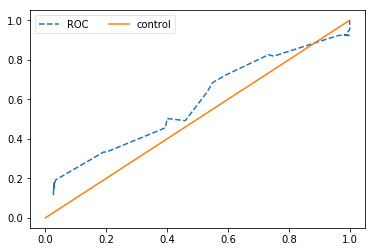

In [59]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.plot(FPR_list, TPR_list, label="ROC",ls='dashed')
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), label="control")
# t1 = np.arange(0.0, 1.0, 0.01)
# for n in [1, 2, 3, 4]:

leg = plt.legend(loc='best', ncol=2, fancybox=True)
leg.get_frame().set_alpha(0.5)

plt.show()

In [29]:
def plot_curve(x_train,y_train,x_val,y_val):
    ax = plt.subplot(111)
    for predictor,name in zip([clf,RF,SVM],['clf','RF','SVM']):
        FPR_list,TPR_list=compute_metrics(clf,x_train,y_train,x_val,y_val)
        plt.plot(FPR_list, TPR_list, label=name)
    plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), label="control", ls='dashed')
    leg = plt.legend(loc='best', ncol=2, fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.show()

/Users/zhilinyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars


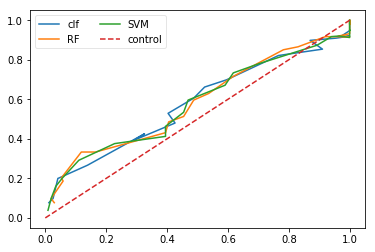

In [61]:
plot_curve(x_train,y_train,x_val,y_val)

In [54]:
from sklearn.feature_selection import mutual_info_classif
x_train,y_train,x_val,y_val=split_train_test(dataset,[])

In [55]:
importances = mutual_info_classif(x_train, y_train)

In [56]:
features = [c for c in dataset.columns if c[:5] == 'smart']
selected_features = [features[i] for i in np.argwhere(importances>0.01).reshape((-1,))]

In [57]:
del_list=[f for f in features if f not in selected_features]
x_train,y_train,x_val,y_val=split_train_test(dataset,del_list)

In [58]:
FPR_list,TPR_list=compute_metrics(clf,x_train,y_train,x_val,y_val)

/Users/zhilinyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars


In [59]:
print(FPR_list,TPR_list)

[0.0054794520547945206, 0.0088495575221238937, 0.0095541401273885346, 0.017241379310344827, 0.022556390977443608, 0.048979591836734691, 0.058035714285714288, 0.078048780487804878, 0.089473684210526316, 0.14204545454545456, 0.2839506172839506, 0.73154362416107388, 0.7720588235294118, 0.79838709677419351, 0.8482142857142857, 0.85999999999999999, 0.8651685393258427, 0.87341772151898733, 0.8571428571428571, 0.88524590163934425, 0.98113207547169812, 0.97777777777777775, 0.97297297297297303, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] [nan, 0.038461538461538464, 0.11764705882352941, 0.10666666666666667, 0.19191919191919191, 0.24166666666666667, 0.29078014184397161, 0.33750000000000002, 0.37714285714285717, 0.40740740740740738, 0.51724137931034486, 0.80555555555555558, 0.86899563318777295, 0.89211618257261416, 0.90513833992094861, 0.92075471698113209, 0.93478260869565222, 0.93706293706293708, 0.94237288135593222, 0.95723684210526316, 0.97756410256410253, 0.984375, 0.99085365853658536, 0.991044776119403, 0.

In [60]:
for i in range(0,len(FPR_list)):
    if 0.1<=FPR_list[i]<0.2:
        print(i)

9


In [62]:
mu_tpr=TPR_list[9]
print(mu_tpr)

0.407407407407


In [61]:
FPR_list[9]

0.14204545454545456

In [39]:
from sklearn.feature_selection import chi2
x_train,y_train,x_val,y_val=split_train_test(dataset,[])
chi2s, p = chi2(x_train - x_train.min(), y_train)
selected_features = [features[i] for i in list(np.argsort(chi2s))[-30:]]

In [40]:
selected_features

['smart_3_raw',
 'smart_188_raw',
 'smart_240_raw_diff',
 'smart_242_raw_diff',
 'smart_3_raw_diff',
 'smart_198_raw_diff',
 'smart_197_raw_diff',
 'smart_194_raw_diff',
 'smart_193_raw_diff',
 'smart_192_raw_diff',
 'smart_191_raw_diff',
 'smart_190_raw_diff',
 'smart_1_raw_diff',
 'smart_188_raw_diff',
 'smart_189_raw_diff',
 'smart_184_raw_diff',
 'smart_183_raw_diff',
 'smart_12_raw_diff',
 'smart_10_raw_diff',
 'smart_9_raw_diff',
 'smart_7_raw_diff',
 'smart_5_raw_diff',
 'smart_4_raw_diff',
 'smart_187_raw_diff',
 'smart_7_raw',
 'smart_241_raw_sum',
 'smart_241_raw_sigma',
 'smart_1_raw_sigma',
 'smart_242_raw_sigma',
 'smart_7_raw_sigma']

In [41]:
del_list=[f for f in features if f not in selected_features]
x_train,y_train,x_val,y_val=split_train_test(dataset,del_list)
FPR_list,TPR_list=compute_metrics(clf,x_train,y_train,x_val,y_val)

/Users/zhilinyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars


In [47]:
for i in range(0,len(FPR_list)):
    if 0.1<=FPR_list[i]<0.2:
        print(i)

1
2


In [48]:
CHI_tpr=TPR_list[2]
print(CHI_tpr)

0.192307692308


In [51]:
FPR_list[2]

0.1887905604719764

In [79]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor()
x_train,y_train,x_val,y_val=split_train_test(dataset,[])
rfg.fit(x_train, y_train)
importances = rfg.feature_importances_

In [80]:
selected_features = [features[i] for i in np.argwhere(importances>0.01).reshape((-1,))]

In [82]:
del_list=[f for f in features if f not in selected_features]
x_train,y_train,x_val,y_val=split_train_test(dataset,del_list)

In [83]:
FPR_list,TPR_list=compute_metrics(clf,x_train,y_train,x_val,y_val)

/Users/zhilinyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars


In [84]:
for i in range(0,len(FPR_list)):
    if 0.1<=FPR_list[i]<0.2:
        print(i)

6


In [85]:
rf_tpr=TPR_list[6]
print(rf_tpr)

0.325


In [86]:
print(FPR_list[6])

0.142857142857


In [90]:
values = [0.33, 0.325, 0.19, 0.41]
labels = ['Proposed', 'RF', 'Chi2', 'Mutual Info']

In [95]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
a,b,c,d = plt.bar(range(len(values)), values, width=0.5)
a.set_facecolor('r')
b.set_facecolor('g')
c.set_facecolor('b')
d.set_facecolor('y')
ax.set_xticks(np.arange(len(values)) + width/2)
ax.set_xticklabels(labels, rotation=90)

[Text(0,0,'Proposed'),
 Text(0,0,'RF'),
 Text(0,0,'Chi2'),
 Text(0,0,'Mutual Info')]

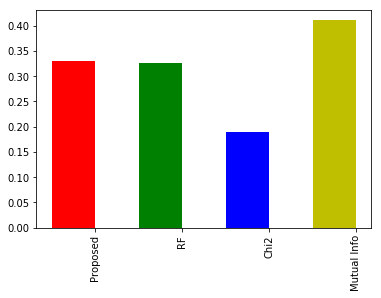

In [96]:
plt.show()